In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 불러오기
df_summary = pd.read_csv("department_jobrole_salary_summary.csv")
plt.rcParams['font.family'] = 'AppleGothic'   # Mac: 애플고딕
# 데이터 확인
print(df_summary.head())
print(df_summary.info())




               Department                    JobRole   총인원수       총월급  \
0         Human Resources            Human Resources   52.0  220259.0   
1         Human Resources                    Manager   11.0  198975.0   
2  Research & Development  Healthcare Representative  131.0  986268.0   
3  Research & Development      Laboratory Technician  259.0  838427.0   
4  Research & Development                    Manager   54.0  925038.0   

           평균월급  잔류인원수    잔류_총월급       잔류_평균월급  이직인원수    이직_총월급       이직_평균월급  \
0   4235.750000   40.0  175670.0   4391.750000   12.0   44589.0   3715.750000   
1  18088.636364   11.0  198975.0  18088.636364    0.0       0.0           NaN   
2   7528.763359  122.0  909334.0   7453.557377    9.0   76934.0   8548.222222   
3   3237.169884  197.0  657433.0   3337.223350   62.0  180994.0   2919.258065   
4  17130.333333   51.0  879720.0  17249.411765    3.0   45318.0  15106.000000   

      이직률(%)  OT_Yes_이직률(%)  OT_No_이직률(%)  
0  23.076923      38.461538   

In [6]:
# 한달 평균 업무 시간 주 40시간 기준 365/12/7 주 
print(365/12/7 * 40)
# 야근 시 업무 시간 (가정) 잡코리아 기준 월 5.1회 야근, 평균 야근 시간을 3시간이라고 가정
print(365/12/7 * 40 + 5.1*3)

173.80952380952382
189.10952380952384


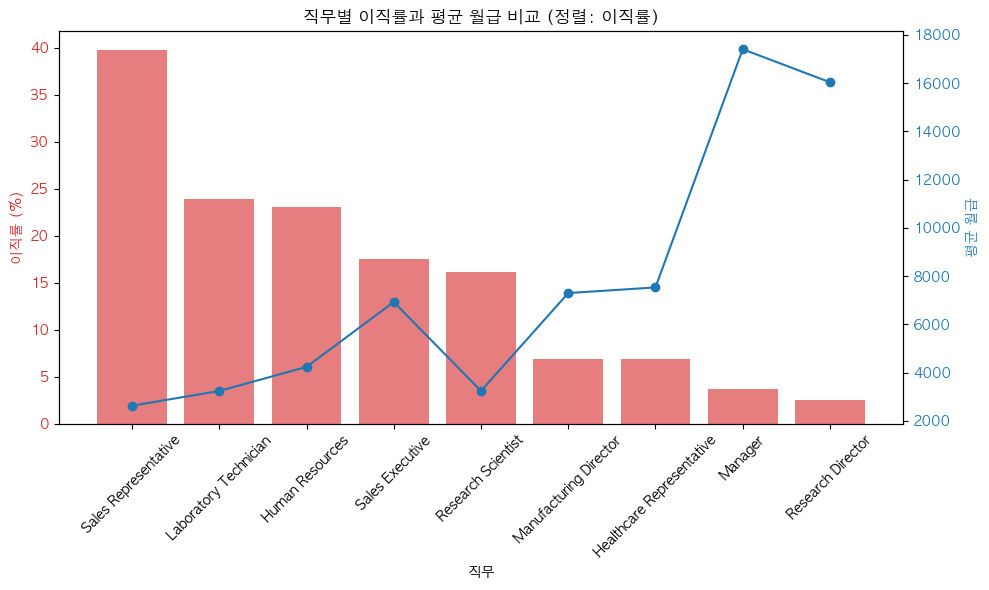

In [2]:
#각 직무별 이직률 sort 해서 , 그리고 그 순서 그대로 각 부서 월급 평균
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기
df_summary = pd.read_csv("department_jobrole_salary_summary.csv")

# 직무별 평균 이직률과 평균 월급 계산
job_stats = df_summary.groupby("JobRole").agg({
    "이직률(%)":"mean",
    "평균월급":"mean"
}).reset_index()

# 이직률 기준으로 정렬
job_stats = job_stats.sort_values("이직률(%)", ascending=False).reset_index(drop=True)

# -----------------------------
# 시각화
# -----------------------------
fig, ax1 = plt.subplots(figsize=(10,6))

# 막대그래프 (이직률)
color = "tab:red"
ax1.set_xlabel("직무")
ax1.set_ylabel("이직률 (%)", color=color)
bars = ax1.bar(job_stats["JobRole"], job_stats["이직률(%)"], color=color, alpha=0.6)
ax1.tick_params(axis="y", labelcolor=color)
plt.xticks(rotation=45)

# 선그래프 (평균월급, 두 번째 y축)
ax2 = ax1.twinx()
color = "tab:blue"
ax2.set_ylabel("평균 월급", color=color)
line = ax2.plot(job_stats["JobRole"], job_stats["평균월급"], color=color, marker="o")
ax2.tick_params(axis="y", labelcolor=color)

plt.title("직무별 이직률과 평균 월급 비교 (정렬: 이직률)")
plt.tight_layout()
plt.show()


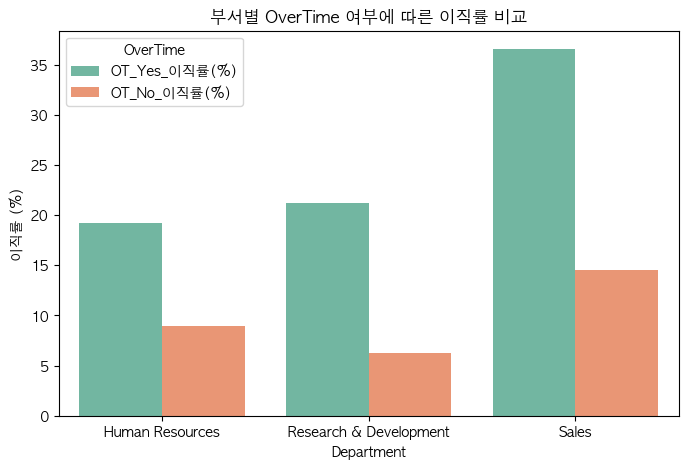

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df_summary = pd.read_csv("department_jobrole_salary_summary.csv")

# 부서별 평균 OT Yes/No 이직률
dept_ot = df_summary.groupby("Department")[["OT_Yes_이직률(%)","OT_No_이직률(%)"]].mean().reset_index()

# Melt해서 long-format으로 변환
df_melt = dept_ot.melt(id_vars="Department", 
                       value_vars=["OT_Yes_이직률(%)","OT_No_이직률(%)"],
                       var_name="OverTime", value_name="이직률")

# 1) 그룹 막대그래프
plt.figure(figsize=(8,5))
sns.barplot(data=df_melt, x="Department", y="이직률", hue="OverTime", palette="Set2")
plt.title("부서별 OverTime 여부에 따른 이직률 비교")
plt.ylabel("이직률 (%)")
plt.show()


